In [ ]:
#Importar librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Objetivo
El presente proyecto tiene como objetivo principal realizar un análisis exhaustivo de una base de datos de libros con el fin de ofrecer predicciones de lectura personalizadas para los clientes. La base de datos contiene información detallada sobre diversos libros, incluyendo detalles como género, autor, calificaciones de usuarios anteriores, y otras características relevantes. Mediante el empleo de técnicas avanzadas de análisis de datos y machine learning, buscamos identificar patrones y tendencias que nos permitan prever las preferencias de lectura de los usuarios. Este enfoque no solo tiene el potencial de mejorar la experiencia de los clientes al recomendarles libros afines a sus intereses, sino que también puede contribuir a la optimización de estrategias de marketing y gestión de inventario. En resumen, este proyecto pretende aprovechar la riqueza de datos disponibles para ofrecer recomendaciones de lectura más precisas y personalizadas, brindando así un valor añadido tanto a los lectores como a la gestión del inventario de la librería

#Exploracion de Data

In [ ]:
base_de_datos=pd.read_csv("books.csv", sep=',',error_bad_lines=False)

<ipython-input-118-b5fea5a76cd3>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  base_de_datos=pd.read_csv("books.csv", sep=',',error_bad_lines=False)
Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



Se utiliza la linea error bad lines para ignorar 4 lineas con problemas de formato

In [ ]:
base_de_datos.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.570,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.490,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.420,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.560,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.780,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
base_de_datos.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000,11123.000,11123.000,11123.000,11123.000,11123.000
mean,21310.857,3.934,9759880247639.154,336.406,17942.848,542.048
std,13094.727,0.350,442975846058.353,241.153,112499.153,2576.620
min,1.000,0.000,8987059752.000,0.000,0.000,0.000
25%,10277.500,3.770,9780345453803.500,192.000,104.000,9.000
50%,20287.000,3.960,9780582461536.000,299.000,745.000,47.000
75%,32104.500,4.140,9780872208045.500,416.000,5000.500,238.000
max,45641.000,5.000,9790007672386.000,6576.000,4597666.000,94265.000


In [ ]:
base_de_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


La base de datos no tiene datos faltantes, por lo cual vamos a entrar a analizar procesos estadisticos.

In [ ]:
language_counts = base_de_datos['language_code'].value_counts()
language_counts

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

El 80% de los libros està escrito en ingles britanico.

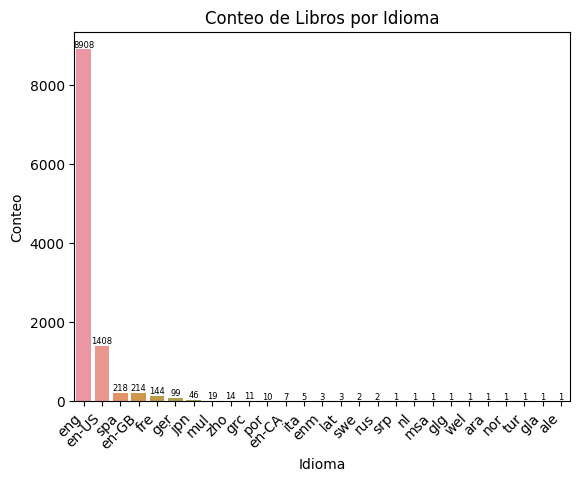

In [ ]:
ax = sns.barplot(x=language_counts.index, y=language_counts.values)
# Añade etiquetas y título
plt.xlabel("Idioma")
plt.ylabel("Conteo")
plt.title("Conteo de Libros por Idioma")
plt.xticks(rotation=45, ha="right")
#Añade etiquetas
ax.bar_label(ax.containers[0], fontsize=6);
# Muestra el gráfico
plt.show()

In [ ]:
raiting=base_de_datos["average_rating"].value_counts(normalize=True)*100
raiting

4.00    1.968893
3.96    1.753124
4.02    1.600288
3.94    1.582307
4.07    1.546345
4.05    1.510384
3.92    1.510384
3.93    1.510384
3.89    1.492403
3.83    1.492403
3.98    1.474422
3.82    1.465432
3.97    1.465432
3.99    1.456442
4.04    1.420480
4.09    1.420480
3.90    1.402499
3.88    1.393509
4.06    1.393509
4.17    1.393509
3.86    1.384519
3.91    1.366538
4.11    1.357547
4.08    1.312596
3.95    1.312596
3.80    1.303605
4.13    1.285624
3.77    1.276634
3.87    1.276634
4.14    1.258653
3.84    1.240672
4.18    1.240672
4.01    1.231682
3.85    1.222692
4.03    1.204711
3.79    1.195721
4.10    1.159759
4.12    1.114807
4.16    1.096826
3.76    1.096826
3.78    1.033894
4.21    1.024903
4.15    1.015913
4.22    1.006923
4.19    0.997932
3.72    0.979951
3.81    0.979951
4.25    0.979951
3.68    0.970961
4.26    0.917019
4.24    0.908028
3.71    0.899038
3.75    0.863077
3.67    0.863077
3.70    0.845096
3.73    0.845096
4.20    0.827115
3.74    0.809134
4.27    0.8091


Para mejorar el análisis de los resultados, se opta por crear intervalos en la variable "average rating", ya que los datos presentan una dispersión significativa. Se establecerán intervalos específicos para agrupar los valores y facilitar la interpretación. En este caso, se han definido los siguientes intervalos: de 4 a 3, de 3 a 2, de 2 a 1, y de 1 a 0. Este enfoque permitirá examinar la distribución de los datos de manera más clara y proporcionará una visión estructurada de la variable "average rating"

In [ ]:
bins=[0,1,2,3,4,5]
base_de_datos['rating_interval']=pd.cut(base_de_datos['average_rating'],bins=bins,right=True)

In [ ]:
base_de_datos_conteo_intervalo=base_de_datos['rating_interval'].value_counts()

In [ ]:
base_de_datos_conteo_intervalo

(3, 4]    6285
(4, 5]    4735
(2, 3]      69
(1, 2]       7
(0, 1]       2
Name: rating_interval, dtype: int64

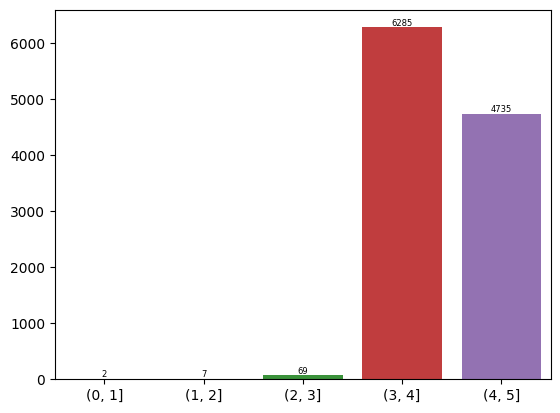

In [ ]:
ax = sns.barplot(x=base_de_datos_conteo_intervalo.index, y=base_de_datos_conteo_intervalo.values)
ax.bar_label(ax.containers[0], fontsize=6);

El 98% del average raiting se encuentra entre (3 y 5]


Vamos a realizar un análisis de los libros que presentan las cantidades de páginas más altas y más bajas. En este contexto, examinaremos en detalle aquellos libros que se destacan por tener una cantidad considerable de páginas, así como aquellos cuya cantidad de páginas es más baja. Este análisis nos permitirá identificar patrones, tendencias o características particulares asociadas a estos extremos en la cantidad de páginas, proporcionando así una visión más completa y detallada de la diversidad en la extensión del contenido de los libros en nuestro conjunto de datos.

In [ ]:
base_de_datos.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'rating_interval'],
      dtype='object')

<Axes: xlabel='  num_pages', ylabel='title'>

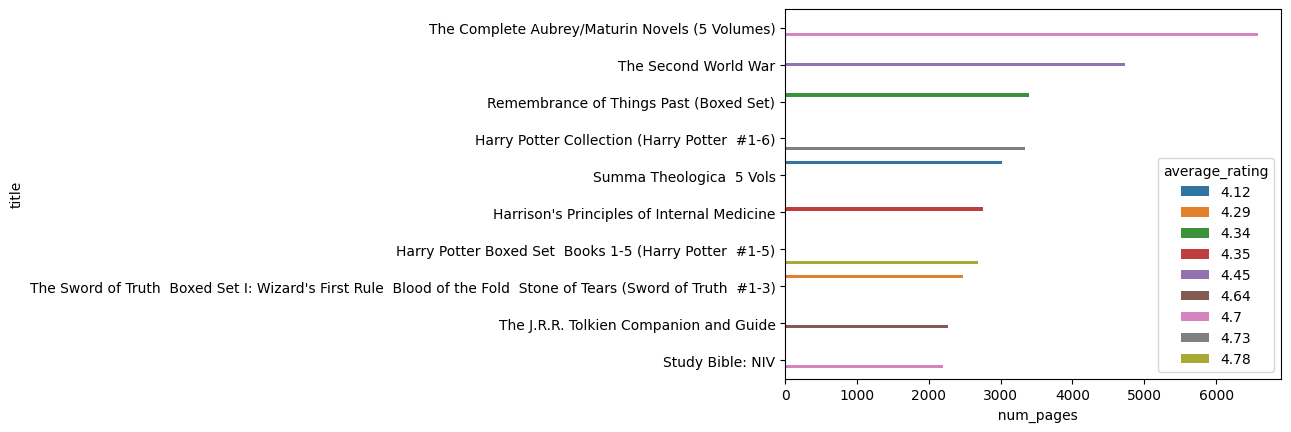

In [ ]:
libros_con_mas_pagina = base_de_datos.nlargest(10, ['  num_pages']).set_index('title')
sns.barplot(x='  num_pages', y=libros_con_mas_pagina.index, data=libros_con_mas_pagina, hue='average_rating')

<Axes: xlabel='  num_pages', ylabel='title'>

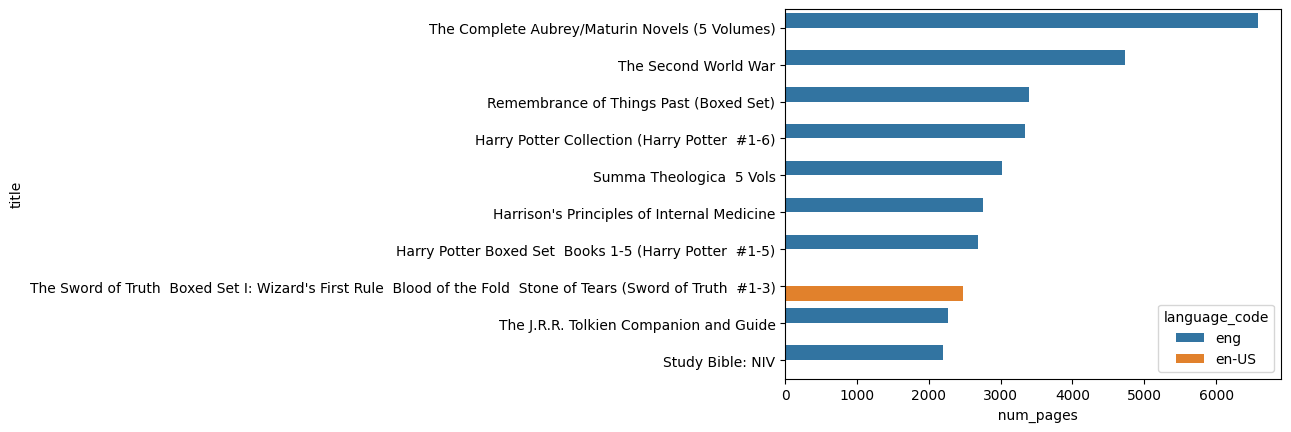

In [ ]:
libros_con_mas_pagina = base_de_datos.nlargest(10, ['  num_pages']).set_index('title')
sns.barplot(x='  num_pages', y=libros_con_mas_pagina.index, data=libros_con_mas_pagina, hue='language_code')

<Axes: xlabel='average_rating', ylabel='title'>

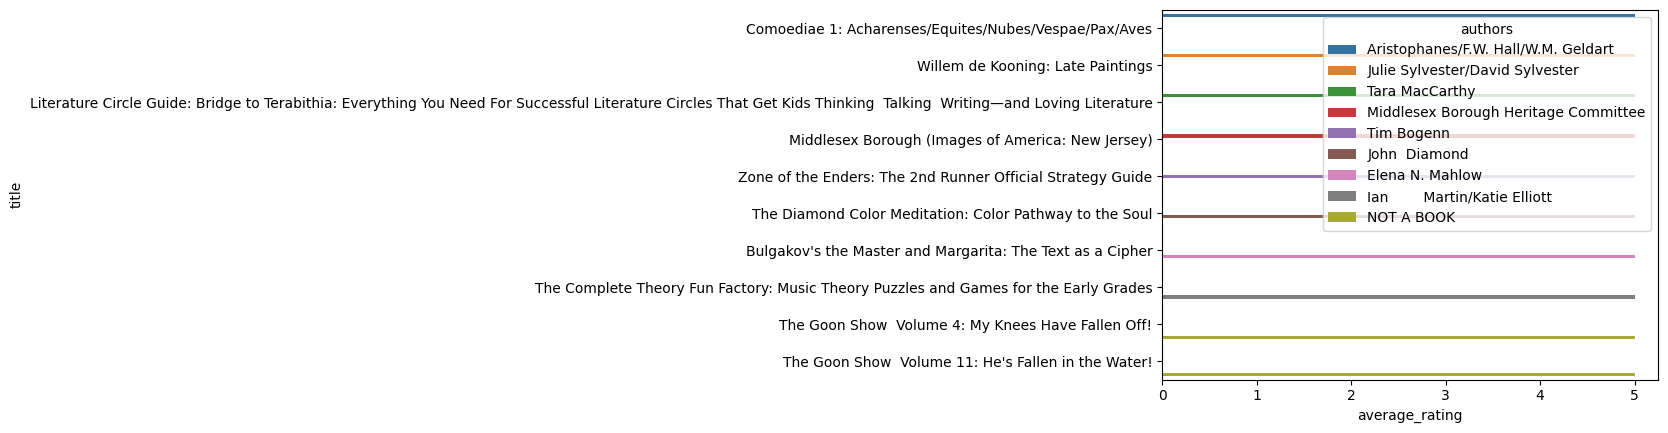

In [ ]:
libros_con_mas_raiting = base_de_datos.nlargest(10, ['average_rating']).set_index('title')
sns.barplot(x='average_rating', y=libros_con_mas_raiting.index, data=libros_con_mas_raiting, hue='authors')

Los 10 libros con mayor cantidad de páginas presentan calificaciones superiores a 4.1, y de este grupo, 9 pertenecen a la categoría de inglés británico, mientras que el restante corresponde al idioma inglés estadounidense.

Concluyamos el análisis examinando la cantidad de libros que cada editorial (publisher) tiene en cada intervalo de calificación promedio. Este enfoque nos permitirá entender cómo se distribuyen los libros de cada editorial en términos de su recepción por parte de los lectores, proporcionando una visión más detallada de la variabilidad en las calificaciones según el editor.

In [ ]:
base_de_datos_conteo_editorial=base_de_datos['publisher'].value_counts()
base_de_datos_conteo_editorial

Vintage                                                                318
Penguin Books                                                          261
Penguin Classics                                                       184
Mariner Books                                                          150
Ballantine Books                                                       144
Harper Perennial                                                       112
HarperCollins                                                          112
Pocket Books                                                           111
Bantam                                                                 110
VIZ Media LLC                                                           88
Berkley                                                                 86
Dover Publications                                                      85
Modern Library                                                          82
Del Rey                  

In [ ]:
base_de_datos_conteo_intervalo=base_de_datos['rating_interval'].value_counts()

In [ ]:
base_de_datos_conteo_intervalo

(3, 4]    6285
(4, 5]    4735
(2, 3]      69
(1, 2]       7
(0, 1]       2
Name: rating_interval, dtype: int64

In [ ]:
top_publishers = base_de_datos['publisher'].value_counts().nlargest(5).index
top_publishers

Index(['Vintage', 'Penguin Books', 'Penguin Classics', 'Mariner Books',
       'Ballantine Books'],
      dtype='object')

In [ ]:
filtered_data = base_de_datos[base_de_datos['publisher'].isin(top_publishers)]


In [ ]:
crosstab_result = pd.crosstab(filtered_data['publisher'], filtered_data['rating_interval'], margins=True)
crosstab_result

rating_interval,"(2, 3]","(3, 4]","(4, 5]",All
publisher,,,,
Ballantine Books,2,88,54,144
Mariner Books,0,89,61,150
Penguin Books,0,166,95,261
Penguin Classics,0,112,72,184
Vintage,3,199,116,318
All,5,654,398,1057


La editorial vintage posee mayor cantidad de libro en el intervalo de 4 a 5



In [ ]:
top_escritores= base_de_datos['authors'].value_counts().nlargest(10).index

In [ ]:
top_escritores

Index(['Stephen King', 'P.G. Wodehouse', 'Rumiko Takahashi',
       'Orson Scott Card', 'Agatha Christie', 'Piers Anthony', 'Sandra Brown',
       'Mercedes Lackey', 'Dick Francis', 'Terry Pratchett'],
      dtype='object')

In [ ]:
escritores= base_de_datos['authors'].value_counts().index

Vamos a calcular el promedio total de las calificaciones para cada escritor. Este análisis implica determinar el promedio de los valores de "average_rating" asociados a cada autor en nuestro conjunto de datos. Al agrupar los datos por autor y calcular el promedio de sus calificaciones, obtendremos una visión integral del rendimiento promedio de cada escritor en términos de evaluación por parte de los lectores. Este enfoque nos permitirá identificar patrones y destacar aquellos escritores cuyas obras tienden a recibir calificaciones más altas o más bajas de manera consistente.

In [ ]:
diccionario_promedio_escritores = {}

for escritor in escritores:
    libros_autor = base_de_datos[base_de_datos['authors'] == escritor]
    # Sumar las calificaciones promedio
    suma_calificaciones = libros_autor['average_rating'].sum()
    promedio_calificaciones = suma_calificaciones / len(libros_autor)

    # Agregar al diccionario
    diccionario_promedio_escritores[escritor] = promedio_calificaciones

# Mostrar el diccionario
print(diccionario_promedio_escritores)


{'Stephen King': 3.9735, 'P.G. Wodehouse': 4.14725, 'Rumiko Takahashi': 4.1866666666666665, 'Orson Scott Card': 3.7791428571428574, 'Agatha Christie': 3.989090909090909, 'Piers Anthony': 3.716666666666667, 'Sandra Brown': 3.742068965517242, 'Mercedes Lackey': 4.0393103448275856, 'Dick Francis': 3.962142857142857, 'Terry Pratchett': 4.113043478260869, 'James Patterson': 3.9060869565217398, 'Laurell K. Hamilton': 3.9886956521739134, 'Margaret Weis/Tracy Hickman': 3.895217391304348, 'Gordon Korman': 3.9331818181818177, 'Bill Bryson': 3.9342857142857146, 'Janet Evanovich': 3.97, 'Alan Dean Foster': 3.747619047619047, 'Dan Simmons': 3.893809523809523, 'Gabriel García Márquez': 3.9110000000000005, 'Dean Koontz': 3.9319999999999995, 'Philip Roth': 3.756111111111111, 'Robert A. Heinlein': 3.9177777777777782, 'Terry Brooks': 4.03611111111111, 'J.R.R. Tolkien': 4.395882352941177, 'Jodi Picoult': 3.7558823529411764, 'Anne Rice': 3.7982352941176467, 'Dr. Seuss': 4.118125, 'Toni Morrison': 3.9375, 

El escritor con mayor publicaciones es stephen King

In [ ]:
df_promedio_escritores = pd.DataFrame(list(diccionario_promedio_escritores.items()), columns=['authors', 'Promedio_Total'])


In [ ]:
df_promedio_escritores = df_promedio_escritores.sort_values(by='Promedio_Total', ascending=False).reset_index(drop=True)
df_promedio_escritores.shape

(6639, 2)

In [ ]:
df_escritores_editorial = base_de_datos[['authors', 'publisher']]

In [ ]:
df_escritores_editorial.shape

(11123, 2)

In [ ]:
df_mergednew = pd.merge(df_promedio_escritores, df_escritores_editorial, on=['authors'], how='left')


In [ ]:
df_mergednew=df_mergednew.rename(columns={'Promedio_Total':'Promedio_escritor'})
df_mergednew

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
base_de_datos=pd.merge(base_de_datos,df_mergednew,on=['authors'])

In [ ]:
#base_de_datos = base_de_datos.drop(columns=['publisher_y'])
base_de_datos=base_de_datos.rename(columns={'publisher_x':'publisher'})
#base_de_datos = base_de_datos.drop(columns=['Promedio_escritor_x','Promedio_escritor_y'])
base_de_datos.head(2)
base_de_datos = base_de_datos.drop(columns=['publisher_y'])

In [ ]:
base_de_datos.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_interval,Promedio_escritor
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,"(4, 5]",4.548333
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,"(4, 5]",4.548333


In [ ]:
publisher=df_mergednew['publisher'].value_counts().index
publisher

Index(['Vintage', 'Penguin Books', 'Penguin Classics', 'Mariner Books',
       'Ballantine Books', 'HarperCollins', 'Harper Perennial', 'Pocket Books',
       'Bantam', 'VIZ Media LLC',
       ...
       'History Press Ltd', 'Abacus Books', 'Acento Editorial',
       'Alan Rodgers Books', 'Xlibris Corporation', 'Lawrence Hill Books',
       'BBC Audiobooks America', 'Signet Classic', 'Courage Books',
       'Gale Cengage'],
      dtype='object', length=2290)

In [ ]:
base_de_datos[base_de_datos['publisher'] == 'Vintage'].value_counts()

bookID  title                                                                                                                        authors                                                                                                                                                                                                                  average_rating  isbn        isbn13         language_code    num_pages  ratings_count  text_reviews_count  publication_date  publisher  rating_interval  Promedio_escritor
18016   Mulliner Nights (Mr. Mulliner  #3)                                                                                           P.G. Wodehouse                                                                                                                                                                                                           4.11            1400079616  9781400079612  eng            240          1174           75                  4/12/2005         Vintag

In [ ]:
diccionario_promedio_editorial = {}

for editorial in publisher:
    libros_editorial = base_de_datos[base_de_datos['publisher'] == editorial]
    suma_calificaciones = libros_editorial['average_rating'].sum()
    promedio_calificaciones = suma_calificaciones / len(libros_editorial )
    # Agregar al diccionario
    diccionario_promedio_editorial[editorial] = promedio_calificaciones

# Mostrar el diccionario
print(diccionario_promedio_editorial)

{'Vintage': 3.850360195360195, 'Penguin Books': 3.914108867427568, 'Penguin Classics': 3.917945205479452, 'Mariner Books': 3.9377800829875524, 'Ballantine Books': 3.851509900990099, 'HarperCollins': 4.041571428571428, 'Harper Perennial': 3.869278846153846, 'Pocket Books': 3.9065783898305084, 'Bantam': 3.8086180631120783, 'VIZ Media LLC': 4.264719334719334, 'Berkley': 3.877044198895027, 'Dover Publications': 3.942827586206896, 'Modern Library': 4.0268421052631584, 'Del Rey': 4.0019741100323625, 'Grand Central Publishing': 3.906824224519941, 'Tor Books': 3.8129012345679016, 'Oxford University Press  USA': 3.9056390977443614, 'Oxford University Press': 3.925357142857142, 'Scribner': 3.7554046997389037, 'W. W. Norton  Company': 4.080353535353535, 'Signet': 3.9498688524590166, 'Cambridge University Press': 3.9341441441441436, 'Simon  Schuster': 3.9040217391304357, 'Anchor': 3.821535714285714, 'Penguin': 3.9642105263157896, 'William Morrow Paperbacks': 3.831461038961039, 'Avon': 3.9214999999

In [ ]:
df_promedio_escritores = pd.DataFrame(list(diccionario_promedio_editorial.items()), columns=['publisher', 'Promedio_Total_editorial'])
df_promedio_escritores

,publisher,Promedio_Total_editorial
0,Vintage,3.850360
1,Penguin Books,3.914109
2,Penguin Classics,3.917945
3,Mariner Books,3.937780
4,Ballantine Books,3.851510
5,HarperCollins,4.041571
6,Harper Perennial,3.869279
7,Pocket Books,3.906578
8,Bantam,3.808618
9,VIZ Media LLC,4.264719


In [ ]:
base_de_datos=pd.merge(base_de_datos,df_promedio_escritores,on=['publisher'])

In [ ]:
base_de_datos.head(2)

,bookID,title,authors_x,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_interval,Promedio_escritor_x,authors_y,Promedio_escritor_y,Promedio_Total_editorial
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,"(4, 5]",4.548333,J.K. Rowling/Mary GrandPré,4.548333,4.106182
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,"(4, 5]",4.548333,J.K. Rowling/Mary GrandPré,4.548333,4.106182


In [ ]:
base_de_datos = base_de_datos.drop(columns=['Promedio_escritor_y','authors_y'])

In [ ]:
base_de_datos.head(1)

,bookID,title,authors_x,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_interval,Promedio_escritor_x,Promedio_Total_editorial
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,"(4, 5]",4.548333,4.106182


#OUTLIERS

En la siguiente unidad procedemos a eliminar los outliers.

<Axes: xlabel='  num_pages'>

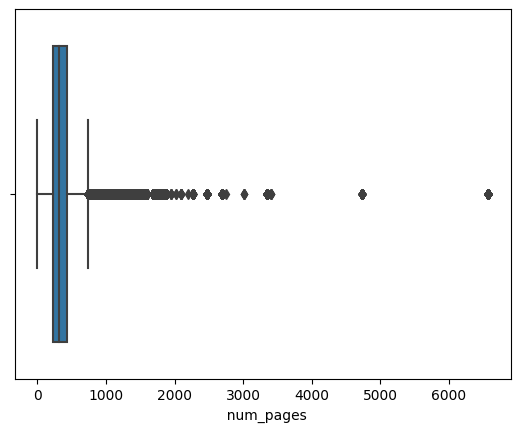

In [ ]:
sns.boxplot(x=base_de_datos['  num_pages'])

<ipython-input-62-ef8a192c65b0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=base_de_datos['  num_pages'],kde=True);


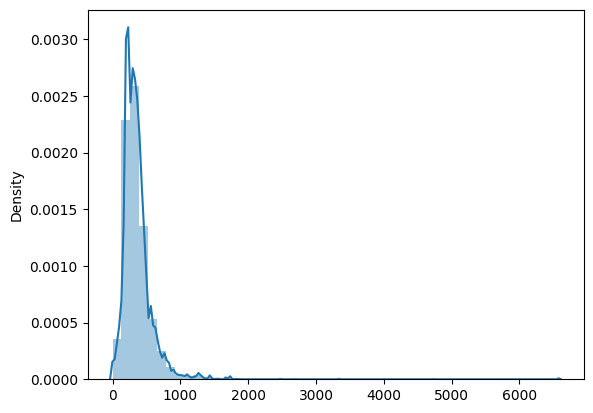

In [ ]:
sns.distplot(x=base_de_datos['  num_pages'],kde=True);

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
base_de_datos['  num_pages'].describe()

count   2631550.000
mean        359.263
std         230.904
min           0.000
25%         230.000
50%         320.000
75%         432.000
max        6576.000
Name:   num_pages, dtype: float64

In [ ]:
percentiles = base_de_datos['  num_pages'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
percentiles

0.100   180.000
0.200   208.000
0.300   241.000
0.400   288.000
0.500   320.000
0.600   356.000
0.700   400.000
0.800   455.000
0.900   578.000
Name:   num_pages, dtype: float64

In [ ]:
base_de_datos = base_de_datos.drop(base_de_datos.index[base_de_datos['  num_pages'] >= 1000])

<Axes: xlabel='  num_pages'>

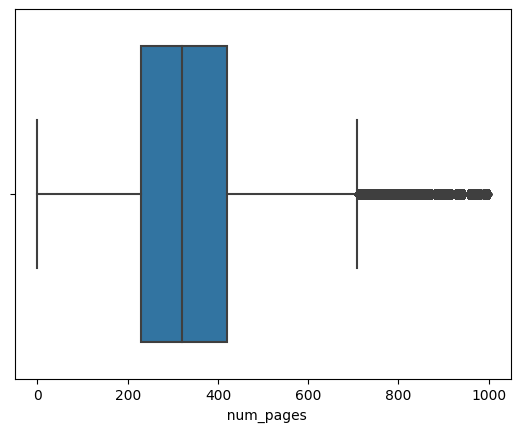

In [ ]:
sns.boxplot(x=base_de_datos['  num_pages'])

<Axes: xlabel='ratings_count'>

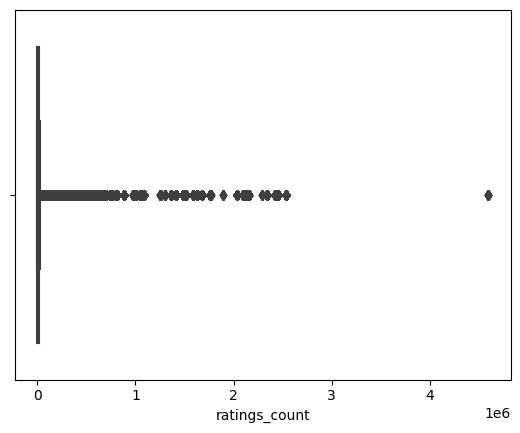

In [ ]:
sns.boxplot(x=base_de_datos['ratings_count'])

In [ ]:
percentiles = base_de_datos['ratings_count'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
percentiles

0.100     170.000
0.200     467.000
0.300    1117.000
0.400    1878.000
0.500    3162.000
0.600    5700.000
0.700    9811.000
0.800   19731.000
0.900   54201.600
Name: ratings_count, dtype: float64

In [ ]:
base_de_datos = base_de_datos.drop(base_de_datos.index[base_de_datos['ratings_count'] >= 1000000])

<Axes: xlabel='ratings_count'>

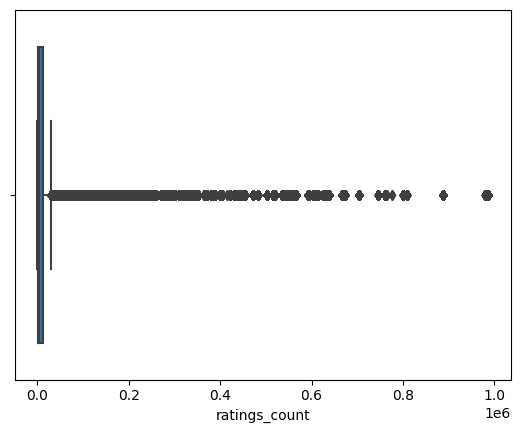

In [ ]:
sns.boxplot(x=base_de_datos['ratings_count'])

##Label Encoder

In [ ]:
base_de_datos.columns

Index(['bookID', 'title', 'authors_x', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'rating_interval',
       'Promedio_escritor_x', 'Promedio_Total_editorial'],
      dtype='object')

In [ ]:
label_encoder = LabelEncoder()
base_de_datos['title'] = label_encoder.fit_transform(base_de_datos['title'])

In [ ]:
base_de_datos['authors_num'] = label_encoder.fit_transform(base_de_datos['authors_x'])

In [ ]:
base_de_datos['lengua_num'] = label_encoder.fit_transform(base_de_datos['language_code'])

#Machine Learning

In [ ]:
X = base_de_datos[['authors_num', 'lengua_num', 'title', 'Promedio_escritor_x', 'Promedio_Total_editorial']]
y = base_de_datos['average_rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [ ]:
linearModel=LinearRegression()

In [ ]:
linearModel.fit(X_train,y_train)

LinearRegression()

In [ ]:
predicciones=linearModel.predict(X_test)

In [ ]:
modelo=pd.DataFrame({'Actual':y_test.tolist(), 'Predicciones':predicciones.tolist()})


In [ ]:
modelo.head(25)

,Actual,Predicciones
0,4.200,4.079
1,3.910,3.888
2,4.150,4.032
3,4.310,4.002
4,4.240,4.118
5,3.730,3.627
6,3.670,3.550
7,3.800,3.969
8,3.410,3.848
9,3.730,3.743


#Errores

In [ ]:
# Calcula el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, predicciones)
mae

0.12191025648553018

In [ ]:
# Calcula el mean squared error (MsE)
mse = mean_squared_error(y_test, predicciones)
mse

0.028307132874361533